In [1]:
import numpy as np
import cupy as cp
import ray
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import misc

from poppy_roman_cgi_phasec import cgi

from importlib import reload
import copy

iwa = 5.9
owa = 20.1

Propagating wavelength 825.000 nm.
PSF calculated in 0.366s


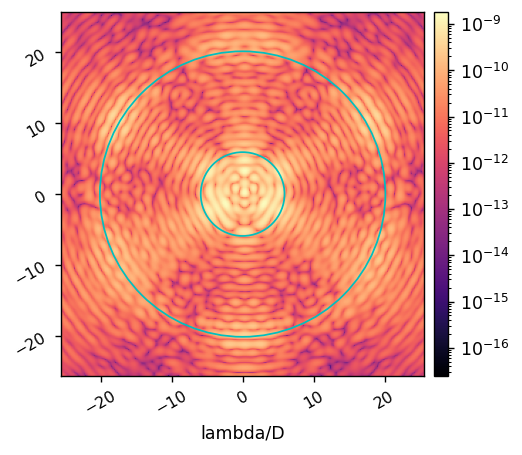

0.5481466704471673

In [3]:
poppy_log.disabled = True

reload(cgi)
spcw = cgi.CGI(cgi_mode='spc-wide', npsf=256, psf_pixelscale_lamD=0.2, 
               use_fpm=True,
               use_pupil_defocus=False, 
               return_intermediates=True)

wfs = spcw.calc_psf()

psf_mono = wfs[-1].intensity

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_mono, lognorm=True, pxscl=spcw.psf_pixelscale_lamD, patches=patches)

# misc.save_pickle(data_dir/'spcw_gpu_wfs_mono', wfs)
0.5481466704471673

In [5]:
%%timeit
wfs = spcw.calc_psf(quiet=True)

334 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
wf_dir = Path('/groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide')

def save_wf(wavefront, fname):
    wf_int = wavefront.intensity.get()
    wf_phase = wavefront.phase.get()
    wf_sampling = wavefront.pixelscale.value
    
    wf = np.zeros(shape=(2, wf_int.shape[0], wf_int.shape[0]))
    wf[0,:,:] = wf_int
    wf[1,:,:] = wf_phase
    hdr = fits.Header()
    hdr['PIXELSCL'] = wf_sampling
    wf_hdu = fits.PrimaryHDU(wf, header=hdr)
    
    wf_fpath = wf_dir/(fname + '_poppy' + '.fits')
    wf_hdu.writeto(wf_fpath, overwrite=True)
    print( 'Wavefront saved to: '+str(wf_fpath) ) 

optics = ['pupil', 'primary', 'secondary', 'poma_fold', 'm3', 'm4', 'm5', 'tt_fold', 'fsm', 'oap1', 
          'focm', 'oap2', 'dm1', 'dm2', 'oap3', 'fold3', 'oap4', 'pupilmask', 'oap5', 'fpm', 'oap6',
          'lyotstop', 'oap7', 'fieldstop', 'oap8', 'filter', 
          'imaging_lens_lens1', 'imaging_lens_lens2', 'fold4', 'image']

for i,wf in enumerate(wfs):
    save_wf(wf, optics[i])

Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/pupil_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/primary_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/secondary_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/poma_fold_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/m3_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/m4_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/m5_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/tt_fold_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/fsm_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-cgi-wfs/spc-wide/oap1_poppy.fits
Wavefront saved to: /groups/douglase/kians-data-files/roman-

IndexError: list index out of range